## Task-D: Collinear features and their effect on linear models

In [101]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('task_d.csv')

In [103]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [104]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>
1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
</pre>

In [105]:
# a. Checking the correlation between the features
correlation_matrix = data.corr()
correlation_matrix

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


<AxesSubplot:>

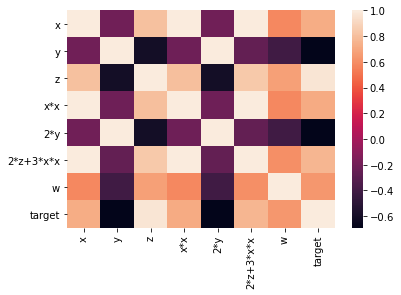

In [106]:
# b. plot heat map of correlation matrix using seaborn heatmap
sns.heatmap(correlation_matrix)

<pre>
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
       random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
       (search for how to get the best hyper parameter value), name the best model as 'best_model'
</pre>

In [107]:
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
logistic_model = LogisticRegression()
pipe = Pipeline(steps=[('logistic', logistic_model)])
folds = KFold(5)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'logistic__C': np.logspace(-4, 4, 5)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=folds)
search.fit(X, Y)
print('Best Hyper parameter (CV score = %0.3f):' % search.best_score_)
print(search.best_params_)

Best Hyper parameter (CV score = 1.000):
{'logistic__C': 1.0}


In [108]:
# Create a new logistic regression model with the best alpha
c = search.best_params_['logistic__C']
best_model = LogisticRegression(C=c)

<pre>
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

</pre>

In [109]:
best_model.fit(X, Y)

best_model_accuracy = best_model.score(X, Y)
print("Best model's accuracy:", best_model_accuracy)

best_model_weights = best_model.coef_
print("Best model's weights: ", best_model_weights)

Best model's accuracy: 1.0
Best model's weights:  [[ 0.72298832 -0.90354834  1.68256456  0.66730582 -0.90354834  0.80372108
   0.5096727 ]]


<pre>
4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
        and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
</pre>

In [110]:
# Adding noise(order of 10^-2) to each element of X
X_dash = X + np.random.normal(0, 10**-2, X.shape)

# train and fit the same 'best_model' with (X', Y)
best_model = LogisticRegression(C=c)
best_model.fit(X_dash, Y)

# accuracy of the model
best_model_accuracy_edited = best_model.score(X, Y)
print("Best model's accuracy edited: ", best_model_accuracy_edited)

# the weights W'
best_model_weights_w_dash = best_model.coef_
print("Best model's weights W': ", best_model_weights_w_dash)

Best model's accuracy edited:  1.0
Best model's weights W':  [[ 0.72303608 -0.90477213  1.68379332  0.66662916 -0.90057042  0.80726328
   0.50706143]]


<pre>
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature
</pre>

In [111]:
# the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference = abs(best_model_accuracy - best_model_accuracy_edited)
print("The difference between 'best_model_accuracy_edited' and 'best_model_accuracy': ", difference)

# the absolute change between each value of W and W' ==> |(W-W')|
absolute_weight_difference = abs(best_model_weights - best_model_weights_w_dash)
print('\nThe absolute weights difference: ', absolute_weight_difference)

# the top 4 features which have higher % change in weights compare to the other feature
absolute_weight_percentage_difference = absolute_weight_difference * 100
# print('\nThe absolute weights percentage difference: ', absolute_weight_percentage_difference)

features = data.columns
top_4_features = np.argsort(-absolute_weight_percentage_difference)[:,:4]
# print('\nThe Top 4 features: ', top_4_features)
print('\nThe Top 4 features having highest percentage weight changes are: ', features[top_4_features])

The difference between 'best_model_accuracy_edited' and 'best_model_accuracy':  0.0

The absolute weights difference:  [[4.77592047e-05 1.22378473e-03 1.22876437e-03 6.76664087e-04
  2.97792282e-03 3.54219226e-03 2.61126323e-03]]

The Top 4 features having highest percentage weight changes are:  [['2*z+3*x*x' '2*y' 'w' 'z']]


#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

<pre>
2. <b>Finding the best model for the given data</b>
    a. Train Linear SVM model on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
       random search CV make sure you choose the alpha in log space)
    c. Creat a new SVM model with the best alpha
       (search for how to get the best hyper parameter value), name the best model as 'best_model'
</pre>

In [144]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [145]:
svm_model = LinearSVC(penalty='l2', max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[('svm', svm_model)])
folds = KFold(5)
param_grid = {
    'svm__C': np.logspace(-4, 4, 5)
}

svm_search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=folds)
svm_search.fit(X, Y)

print('Best parameter (CV score=%0.3f): ' % svm_search.best_score_)
print(svm_search.best_params_)

Best parameter (CV score=1.000): 
{'svm__C': 0.0001}


In [146]:
# Create a new  model with the best alpha
c = svm_search.best_params_['svm__C']
best_svm_model = LinearSVC(C=c)

<pre>
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

</pre>

In [147]:
best_svm_model.fit(X, Y)

best_svm_model_accuracy = best_svm_model.score(X, Y)
print("Best SVM model's accuracy:", best_svm_model_accuracy)

best_svm_model_weights = best_svm_model.coef_
print("Best SVM model's weights: ", best_svm_model_weights)

Best SVM model's accuracy: 1.0
Best SVM model's weights:  [[ 0.01323056 -0.01280974  0.01791372  0.01305589 -0.01280974  0.01391318
   0.01167827]]


<pre>
4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
        and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
</pre>

In [148]:
# Adding noise(order of 10^-2) to each element of X

X_dash = X + np.random.normal(0, 10**-2, X.shape)

# train and fit the same 'best_model' with (X', Y)
best_svm_model = LinearSVC(C=c)
best_svm_model.fit(X_dash, Y)

# accuracy of the model
best_svm_model_accuracy_edited = best_svm_model.score(X, Y)
print("Best SVM model's accuracy edited: ", best_svm_model_accuracy_edited)

# the weights W'
best_svm_model_weights_w_dash = best_svm_model.coef_
print("Best SVM model's weights W': ", best_svm_model_weights_w_dash)

Best SVM model's accuracy edited:  1.0
Best SVM model's weights W':  [[ 0.01324642 -0.01280803  0.01790376  0.01309328 -0.01279401  0.01392715
   0.01168332]]


<pre>
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature
</pre>

In [150]:
# the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
difference_svm = abs(best_svm_model_accuracy - best_svm_model_accuracy_edited)
print("The difference between 'best_svm_model_accuracy_edited' and 'best_svm_model_accuracy': ", difference_svm)

# the absolute change between each value of W and W' ==> |(W-W')|
absolute_weight_difference_svm = abs(best_svm_model_weights - best_svm_model_weights_w_dash)
print('\nThe absolute weights difference SVM: ', absolute_weight_difference_svm)

# the top 4 features which have higher % change in weights compare to the other feature
absolute_weight_percentage_difference_svm = absolute_weight_difference_svm * 100
#print('\nThe absolute weights percentage difference SVM: ', absolute_weight_percentage_difference_svm)

features_svm = data.columns
top_4_features_svm = np.argsort(-absolute_weight_percentage_difference_svm)[:,:4]
#print('\nThe Top 4 features for SVM: ', top_4_features_svm)
print('\nThe Top 4 features having highest percentage weight changes are (SVM): ', features_svm[top_4_features_svm])

The difference between 'best_svm_model_accuracy_edited' and 'best_svm_model_accuracy':  0.0

The absolute weights difference SVM:  [[1.58618545e-05 1.70315987e-06 9.95589050e-06 3.73872305e-05
  1.57287379e-05 1.39704051e-05 5.05281642e-06]]

The Top 4 features having highest percentage weight changes are (SVM):  [['x*x' 'x' '2*y' '2*z+3*x*x']]


#### Observations:-
1. The model accuracy for both Logistic Regression and Linear SVM, are not affected by the Multi colinearity.
2. The Top 4 features with maximum absolute percentage weight difference from original data to noisy data we can conclude that features having multi colinearity and high correlation is affected by added noise and coefficient are changing for those features.